In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [98]:
# X = np.array([[0, 1],
#             [2, 3],
#             [4, 5]])

# poly = PolynomialFeatures(degree=2)
# X_poly = poly.fit_transform(X)
# print(X_poly)

In [99]:
data = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [100]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [101]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


lets check for simple linear regression now

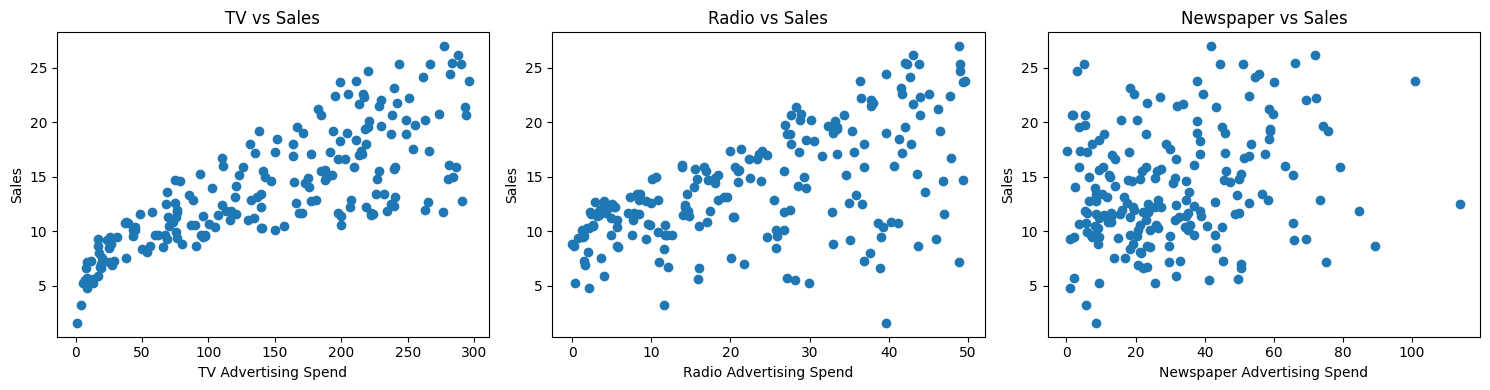

In [102]:
plt.figure(figsize=(15,4))

# TV
plt.subplot(1,3,1)
plt.scatter(data['TV'], data['sales'])
plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.title("TV vs Sales")

# Radio
plt.subplot(1,3,2)
plt.scatter(data['radio'], data['sales'])
plt.xlabel("Radio Advertising Spend")
plt.ylabel("Sales")
plt.title("Radio vs Sales")

# Newspaper
plt.subplot(1,3,3)
plt.scatter(data['newspaper'], data['sales'])
plt.xlabel("Newspaper Advertising Spend")
plt.ylabel("Sales")
plt.title("Newspaper vs Sales")

plt.tight_layout()
plt.show()


### Train Test Split

In [103]:
X = data[['TV']]      
y = data['sales']

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (160, 1)
X_test shape: (40, 1)
y_train shape: (160,)
y_test shape: (40,)


In [104]:
from sklearn.linear_model import LinearRegression
# Create model
lin_model = LinearRegression()

# Train lin_model
lin_model.fit(X_train, y_train)

# Get parameters
m = lin_model.coef_[0]      # slope
c = lin_model.intercept_    # intercept

print("Slope (m):", m)
print("Intercept (c):", c)

Slope (m): 0.046529733705443346
Intercept (c): 7.119638430592953


In [105]:
y_pred = lin_model.predict(X_test)

In [106]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 10.204654118800956
RMSE: 3.194472431998898
R2 Score: 0.6766954295627076


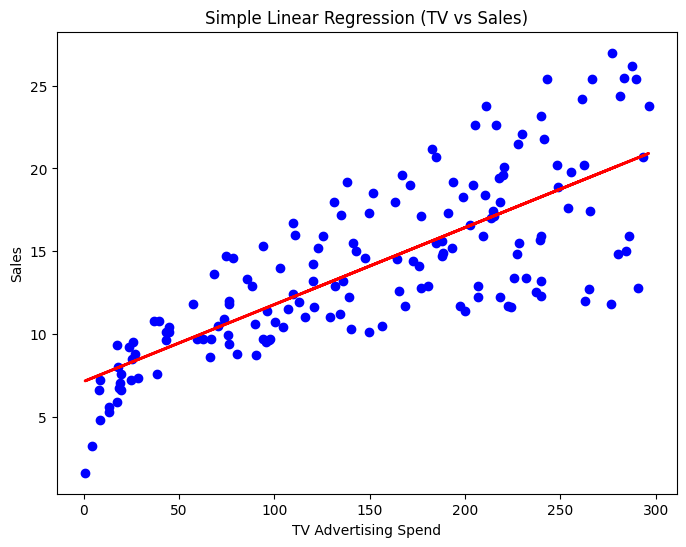

/var/folders/9v/xp4ypl7x41q8xv91t5m0dv2c0000gn/T/ipykernel_82260/3376764308.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


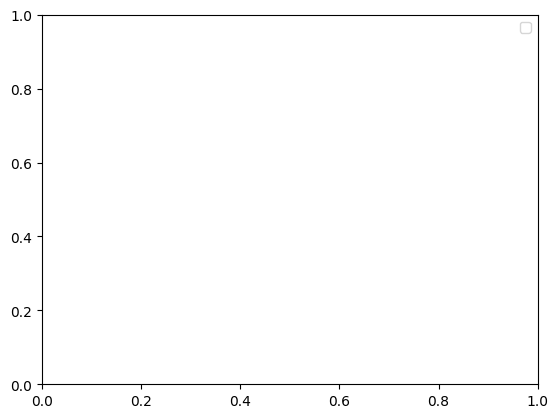

In [107]:
plt.figure(figsize=(8,6))

# Scatter points (Training data)
plt.scatter(X_train, y_train, 
            color='blue', 
            label='Training Data')

# Regression line
plt.plot(X_train, lin_model.predict(X_train), 
         color='red', 
         linewidth=2,
         label='Regression Line')

plt.xlabel("TV Advertising Spend")
plt.ylabel("Sales")
plt.title("Simple Linear Regression (TV vs Sales)")

plt.show()
plt.legend()

now we just observed that linear regression is not able to plot the best decision boundary
hence we switch to polynomial linear regression

In [108]:
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly2.fit_transform(X_train)
X_test_poly = poly2.fit_transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)



,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [109]:
y_test_pred_poly = poly_model.predict(X_test_poly)

# R²
r2 = r2_score(y_test, y_test_pred_poly)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))

print("R² Score:", r2)
print("RMSE:", rmse)

R² Score: 0.6825425353329775
RMSE: 3.1654539086290416


until now, we just saw that the R^2 score did not improve much
we checked for simple linear regression, polynomial simple regression as well and its not giving us good results since the output value depends on 3 variables
now we test it for multiple linear regression and multiple polynomial regression

In [110]:
from sklearn.model_selection import cross_val_score
import numpy as np

degrees = [1, 2, 3, 4, 5]

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)

    model = LinearRegression()
    cv_r2 = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='r2').mean()

    print(f"Degree {d}: | CV R^2 : {cv_r2:.4f}")

Degree 1: | CV R^2 : 0.5380
Degree 2: | CV R^2 : 0.5382
Degree 3: | CV R^2 : 0.5321
Degree 4: | CV R^2 : 0.5267
Degree 5: | CV R^2 : 0.5209


In [111]:
# Features and target
X = data[['TV', 'radio', 'newspaper']]
y = data['sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [112]:
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [113]:
print("Intercept:", mlr_model.intercept_)
print("Coefficients:", mlr_model.coef_)


Intercept: 2.9790673381226274
Coefficients: [0.04472952 0.18919505 0.00276111]


In [114]:
y_pred = mlr_model.predict(X_test)

In [115]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

R² Score: 0.899438024100912
RMSE: 1.7815996615334504


In [116]:
### training the polynomial regression model now

In [117]:
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit ONLY on training data
X_train_poly = poly.fit_transform(X_train)

# Transform test data
X_test_poly = poly.transform(X_test)


In [118]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [119]:
y_test_pred_poly = poly_model.predict(X_test_poly)


In [120]:
r2 = r2_score(y_test, y_test_pred_poly)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))

print("Polynomial Regression R²:", r2)
print("Polynomial Regression RMSE:", rmse)


Polynomial Regression R²: 0.9869181490609601
Polynomial Regression RMSE: 0.6425809120553702
